## Keypoint Detection
---
There are 5 images given in the ***img*** folder. Your task is to detect ***100*** keypoints for each of them using detectors.

You are free to use any languages (C, Matlab, Python), any keypoint detection methods (such as SIFT, ORB, ...)

Let's take a look at these images first!

---

In [1]:
# load packages
import cv2
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

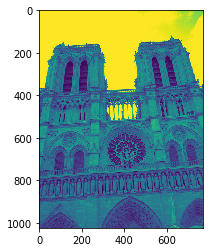

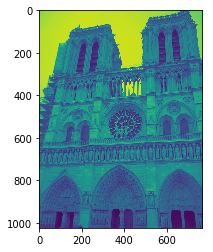

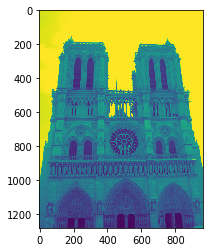

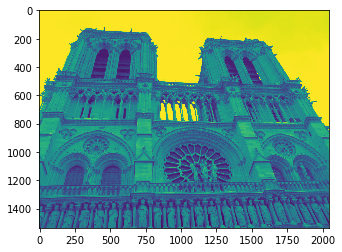

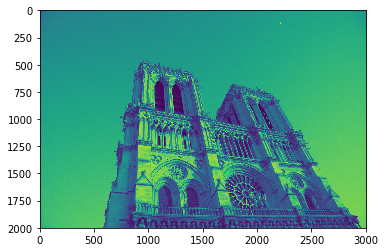

In [2]:
img_dir = "img"
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    for img in os.listdir(img_dir):
        if not img.endswith("jpg"):
            continue
        image_dir = os.path.join(img_dir, img)
        image = cv2.imread(image_dir)
        gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        plt.show()
else:
    print("image folder not exists!")
    exit(0)

### The Keypoints:
The output of this part is a list of keypoints that represented by the x and y cooridnates.

For example, the 10 points of image ***NotreDame5.jpg*** are:

In [3]:
keypoints = list([(1896.0, 1815.0), (1614.0, 1164.0), (1471.0, 964.0), (2099.0, 1032.0), (2080.0, 980.0), (1462.0, 925.0), (1707.0, 1057.0), (1840.0, 1138.0), (1309.0, 1105.0), (1959.0, 1778.0)])

Then we can obtain the patches with these keypoints:


In [4]:
def getPatches(kps, img, size=32, num=500):
    res = torch.zeros(num, 1, size, size)
    if type(img) is np.ndarray:
        img = torch.from_numpy(img)
    h, w = img.shape      # note: for image, the x direction is the verticle, y-direction is the horizontal...
    for i in range(num):
        cx, cy = kps[i]
        cx, cy = int(cx), int(cy)
        dd = int(size/2)
        xmin, xmax = max(0, cx - dd), min(w, cx + dd ) - 1
        ymin, ymax = max(0, cy - dd), min(h, cy + dd ) - 1 
        
        xmin_res, xmax_res = dd - min(dd,cx), dd + min(dd, w - cx)-1
        ymin_res, ymax_res = dd - min(dd,cy), dd + min(dd, h - cy)-1
        res[i, 0, xmin_res: xmax_res, ymin_res: ymax_res] = img[ymin: ymax, xmin: xmax]
    return res

### Let's plot these patches

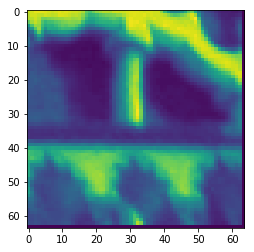

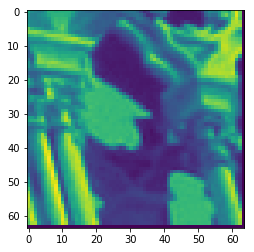

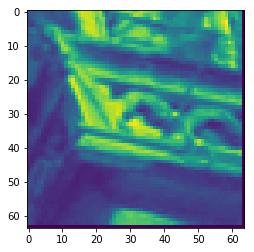

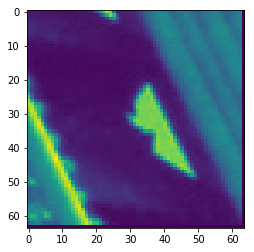

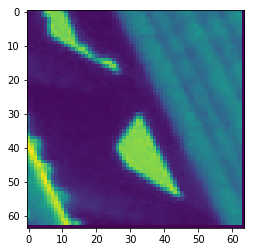

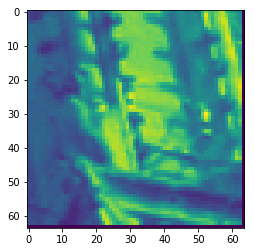

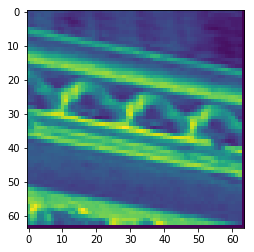

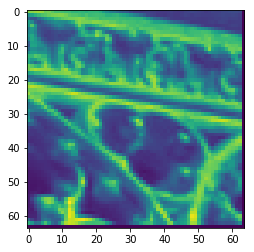

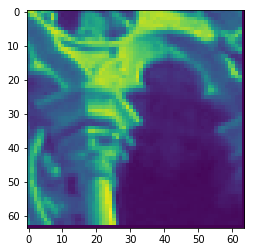

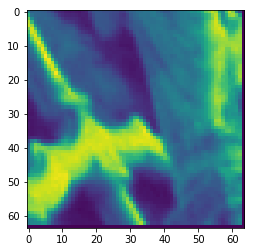

In [5]:
img = cv2.imread('img/NotreDame5.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
patches = getPatches(keypoints, gray,size=64, num=10)
for patch in patches:
    im = patch[0].numpy()
    plt.imshow(im)
    plt.show()

### Save the patches with PyTorch
For each image, you can output the patches within one tensor. In above examples, tensor ***patches*** is the one that you should store in a list. And then save the list as a "patches.pt" file:

In [6]:
all_patches = []
all_patches.append(patches)
output_dir = "patches.pt"
torch.save(all_patches, output_dir)

### Test with your saved patches

In [7]:
test_patches = torch.load(output_dir)
print(type(test_patches))
print(test_patches[0].shape)

<class 'list'>
torch.Size([10, 1, 64, 64])
